# Importando bibliotecas

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import collections
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from skopt import gp_minimize
%matplotlib inline

# Lendo dados 

In [2]:
listings = pd.read_csv('listings.csv')
reviews = pd.read_csv('reviews.csv')
calendar = pd.read_csv('calendar.csv')

/home/luis/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (61,62,94) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,17878,https://www.airbnb.com/rooms/17878,20191122092441,2019-11-22,Very Nice 2Br - Copacabana - WiFi,Pls note that special rates apply for Carnival...,- large balcony which looks out on pedestrian ...,Pls note that special rates apply for Carnival...,none,This is the best spot in Rio. Everything happe...,...,t,f,strict_14_with_grace_period,f,f,1,1,0,0,2.13
1,25026,https://www.airbnb.com/rooms/25026,20191122092441,2019-11-22,Beautiful Modern Decorated Studio in Copa,"Our apartment is a little gem, everyone loves ...",This newly renovated studio (last renovations ...,"Our apartment is a little gem, everyone loves ...",none,Copacabana is a lively neighborhood and the ap...,...,f,f,strict_14_with_grace_period,t,t,3,3,0,0,2.04
2,31560,https://www.airbnb.com/rooms/31560,20191122092441,2019-11-22,NICE & COZY 1BDR - IPANEMA BEACH,This nice and clean 1 bedroom apartment is loc...,This nice and clean 1 bedroom apartment is loc...,This nice and clean 1 bedroom apartment is loc...,none,Die Nachbarschaft von Ipanema ist super lebend...,...,t,f,strict_14_with_grace_period,f,f,1,1,0,0,2.38
3,35636,https://www.airbnb.com/rooms/35636,20191122092441,2019-11-22,Cosy flat close to Ipanema beach,This cosy apartment is just a few steps away ...,"The location is extremely convenient, safe and...",This cosy apartment is just a few steps away ...,none,The apartment street is very quiet and safe ....,...,f,f,strict_14_with_grace_period,t,t,1,1,0,0,2.28
4,35764,https://www.airbnb.com/rooms/35764,20191122092441,2019-11-22,COPACABANA SEA BREEZE - RIO - 20 X Superhost,Our newly renovated studio is located in the b...,"FEEL LIKE YOUR HOME LIVING AS ""CARIOCA"" LOCAL ...",Our newly renovated studio is located in the b...,none,Our guests will experience living with a local...,...,f,f,strict_14_with_grace_period,f,t,1,1,0,0,2.84


In [4]:
reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,17878,64852,2010-07-15,135370,Tia,This apartment is in a perfect location -- two...
1,17878,76744,2010-08-11,10206,Mimi,we had a really great experience staying in Ma...
2,17878,91074,2010-09-06,80253,Jan,Staying in Max appartment is like living in a ...
3,17878,137528,2010-11-12,230449,Orene,In general very good and reasonable price.\r\n...
4,17878,147594,2010-12-01,219338,David,The apt was nice and in a great location only ...


In [5]:
calendar.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,3042602,2019-11-22,t,"$1,679.00","$1,679.00",1.0,1125.0
1,3042602,2019-11-23,t,"$1,679.00","$1,679.00",1.0,1125.0
2,3042602,2019-11-24,t,"$1,679.00","$1,679.00",1.0,1125.0
3,3042602,2019-11-25,t,"$1,679.00","$1,679.00",1.0,1125.0
4,3042602,2019-11-26,t,"$1,679.00","$1,679.00",1.0,1125.0


# Limpeza de dados / pré-processamento

Como o arquivo de listings tem muitas columas, vamos ver o que está em cada uma delas.

In [6]:
print(len(listings.columns))
print(list(listings.columns))

106
['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary', 'space', 'description', 'experiences_offered', 'neighborhood_overview', 'notes', 'transit', 'access', 'interaction', 'house_rules', 'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since', 'host_location', 'host_about', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 'host_listings_count', 'host_total_listings_count', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'street', 'neighbourhood', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market', 'smart_location', 'country_code', 'country', 'latitude', 'longitude', 'is_location_exact', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'square_feet', 'price', 'weekly_price', 'monthly_price

Algumas destas colunas parecem ser binárias. Vamos ver o que há nestes dados.

In [7]:
listings['is_location_exact'].unique()

array(['t', 'f'], dtype=object)

Os dados binários estão apresentados com 't' (True) e 'f' (False). Para melhor interpretá-los, é melhor que sejam variáveis binárias (1 e 0). Vamos então realizar esta conversão.

In [8]:
binary_cols = ['host_is_superhost', 'host_identity_verified', 'is_location_exact',
               'has_availability', 'requires_license', 'instant_bookable',
               'is_business_travel_ready', 'require_guest_profile_picture',
               'require_guest_phone_verification',  'host_has_profile_pic']

for col in binary_cols:
    listings[col] = listings[col].apply(lambda x: 1 if x == 't' else 0)

Na Coluna de avaliações por mês existem muitos valores nulos. Podemos interpretar que os valores nulos correspondem a zero.

In [9]:
listings['reviews_per_month'].fillna(0, inplace=True)

As variáveis de preço estão com um $ em todos os valores, devemos converter estes dados para pontos flutuantes (Float)

In [10]:
listings['price'] = listings['price'].replace('[\$,)]', '', regex=True).astype(float)
listings['extra_people'] = listings['extra_people'].replace('[\$,)]', '', regex=True).astype(float)
listings['cleaning_fee'] = listings['cleaning_fee'].replace('[\$,)]', '', regex=True).astype(float)

Como diversas colunas são dados textuais, estas teriam de receber um tratamento especial, possivelmente envolvendo processamento de linguagem natural (NLP), mas para manter nosso modelo simples, vamos descartar estas informações. Possíveis abordagens para extrair features relevantes destes campos seriam a utilização de palavras chaves, Word2Vec, mecanismos de análise de sentimentos, etc.

In [11]:
string_cols = ['listing_url', 'scrape_id', 'last_scraped', 'name', 'summary', 'space', 'description',
               'neighborhood_overview', 'notes', 'transit', 'access', 'interaction', 'house_rules',
               'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url', 'host_id', 'host_url',
               'host_name', 'host_location', 'host_about', 'host_thumbnail_url', 'host_picture_url',
               'host_neighbourhood', 'host_verifications', 'calendar_last_scraped', 'calendar_updated']
listings = listings.drop(string_cols, axis=1)

Se existem colunas constantes, podemos descartá-las

In [12]:
listings = listings.drop([x for x in listings.columns if listings[x].nunique() < 2], axis=1)

Como nossos dados foram recolhidos selecionando apenas a cidade do Rio de Janeiro, podemos descartar algumas informações relativas a localização.

In [13]:
drop_cols = ['city', 'state', 'zipcode', 'market', 'smart_location',
             'country_code', 'country', 'street', 'neighbourhood_cleansed']
listings = listings.drop(drop_cols, axis=1)

Quase sempre é bastante útil extrair features de datas, por exemplo para extrair dados de sasonalidade. No entanto, para manter nosso modelo simples, vamos descartar estes dados.

In [14]:
drop_cols = ['host_since', 'first_review', 'last_review']
listings = listings.drop(drop_cols, axis=1)

A variável 'host_response_rate' está como uma string. Ela pode ser convertida para um número para ser melhor interpretado por nossos modelos. Note que existem valores nulos nesta coluna, mas ainda não irei tratá-los.

In [15]:
host_response_rate = []
for p in listings['host_response_rate']:
    if type(p) == str:
        host_response_rate.append(float(p.replace('%', '')))
    else:
        host_response_rate.append(p)
listings['host_response_rate'] = host_response_rate

Algumas informações sobre os dados que ainda temos:

In [16]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33715 entries, 0 to 33714
Data columns (total 59 columns):
id                                              33715 non-null int64
host_response_time                              21481 non-null object
host_response_rate                              21481 non-null float64
host_is_superhost                               33715 non-null int64
host_listings_count                             33695 non-null float64
host_total_listings_count                       33695 non-null float64
host_has_profile_pic                            33715 non-null int64
host_identity_verified                          33715 non-null int64
neighbourhood                                   31757 non-null object
latitude                                        33715 non-null float64
longitude                                       33715 non-null float64
is_location_exact                               33715 non-null int64
property_type                                   337

Algumas colunas possuem muitos valores nulos, portanto serão descartadas.

'host_total_listings_count' está sendo descartado por significar o mesmo que 'host_listings_count'.

In [17]:
drop_cols = ['license', 'square_feet', 'host_response_time', 'security_deposit',
             'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness',
             'review_scores_checkin', 'review_scores_communication', 'review_scores_location',
             'review_scores_value', 'host_total_listings_count', 'calculated_host_listings_count',
             'calculated_host_listings_count_entire_homes', 'calculated_host_listings_count_private_rooms',
             'calculated_host_listings_count_shared_rooms', 'id']
listings = listings.drop(drop_cols, axis=1)

Como nossa ideia é prever a variável 'price', não podemos utilizar as variáveis 'weekly_price' e 'monthly_price'.

In [18]:
drop_cols = ['weekly_price', 'monthly_price']
listings = listings.drop(drop_cols, axis=1)

Notemos o que há dentro da variável 'amenities':

Idealmente, podemos criar uma variável categorica para cada uma das opções possíveis dentro de 'amenities'. No entanto, para simplificar o problema, vou selecionar algumas destas possibilidades que aparentemente teriam um maior impacto no preço.

In [19]:
some_amenities = ['Cable TV', 'Internet', 'Wifi', 'Air conditioning', 'Lockbox', 'Kitchen', 'Gym',
                  'Hot tub', 'Private entrance', 'Laptop friendly workspace', '24-hour check-in',
                  'Breakfast', 'parking', 'pets_allowed', 'event_suitable']

for amenitie in some_amenities:
    listings.loc[listings['amenities'].str.contains(amenitie), amenitie] = 1
    listings[amenitie].fillna(0, inplace=True)

listings = listings.drop('amenities', axis=1)

Agora, devemos tratar os valores nulos. Nota-se que devemos fazer alguns destes tratamentos visualizando apenas o conjunto de treinamento. Então, vou manter alguns valores nulos por hora.

In [20]:
listings['host_listings_count'].fillna(1, inplace=True) # Grande maioria é 1
listings['neighbourhood'].fillna('desconhecido', inplace=True) # nulos são considerados desconhecidos

In [21]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33715 entries, 0 to 33714
Data columns (total 54 columns):
host_response_rate                  21481 non-null float64
host_is_superhost                   33715 non-null int64
host_listings_count                 33715 non-null float64
host_has_profile_pic                33715 non-null int64
host_identity_verified              33715 non-null int64
neighbourhood                       33715 non-null object
latitude                            33715 non-null float64
longitude                           33715 non-null float64
is_location_exact                   33715 non-null int64
property_type                       33715 non-null object
room_type                           33715 non-null object
accommodates                        33715 non-null int64
bathrooms                           33661 non-null float64
bedrooms                            33673 non-null float64
beds                                33667 non-null float64
bed_type           

 # Breve visualização de dados

/home/luis/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/luis/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


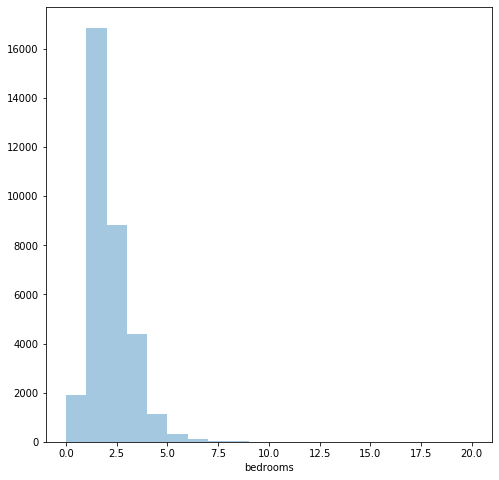

In [22]:
plt.figure(figsize=(8,8))
sns.distplot(listings['bedrooms'], bins = 20, kde=False)

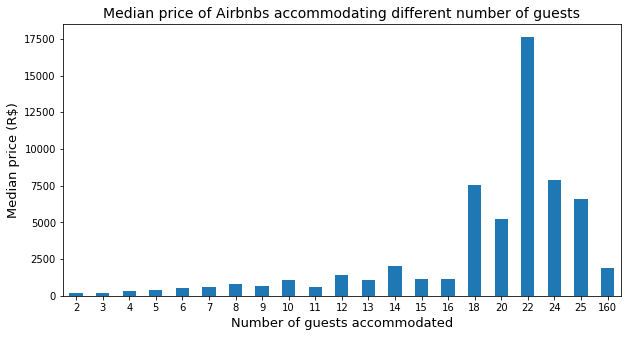

In [23]:
plt.figure(figsize=(10,5))
listings.groupby('accommodates').price.median().plot(kind='bar')
plt.title('Median price of Airbnbs accommodating different number of guests', fontsize=14)
plt.xlabel('Number of guests accommodated', fontsize=13)
plt.ylabel('Median price (R$)', fontsize=13)
plt.xticks(rotation=0)
plt.xlim(left=0.5)
plt.show()

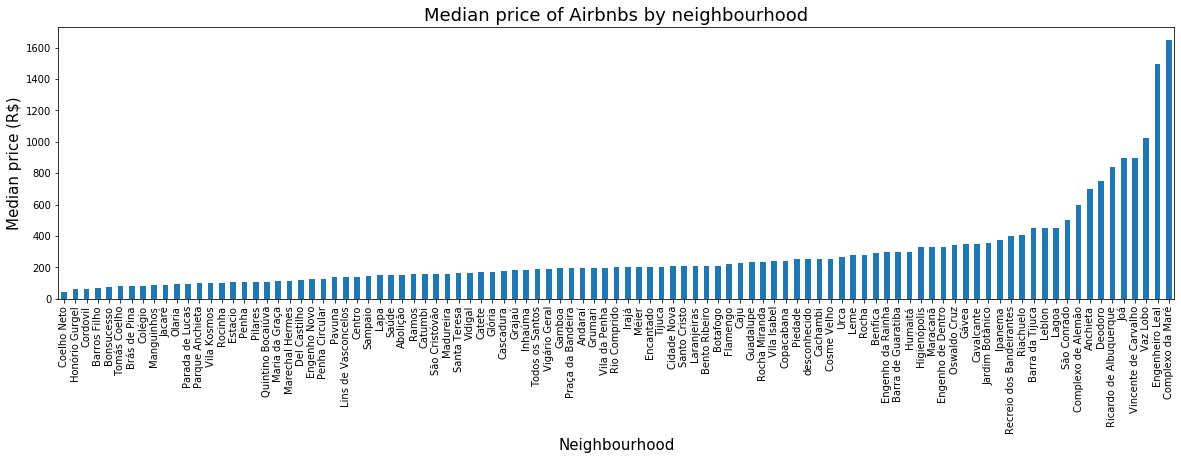

In [24]:
plt.figure(figsize=(20,5))
listings.groupby('neighbourhood').price.median().sort_values().plot(kind='bar')
plt.title('Median price of Airbnbs by neighbourhood', fontsize=18)
plt.xlabel('Neighbourhood', fontsize=15)
plt.ylabel('Median price (R$)', fontsize=15)
plt.xticks(rotation=90)
plt.xlim(left=0.5)
plt.show()

# Final de pré-processamento

Várias variáveis são dados categoricos. Para melhor lidar com eles, vamos utilizar o pd.dummies

In [25]:
listings = pd.get_dummies(listings)

# Modelagem

Dividindo nossos dados em Treinamento (60%), validação(20%) e teste(20%):

In [26]:
X = listings.drop('price', axis=1)
y = listings['price']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=123)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)

Existem valores nulos em 'bathrooms', 'bedrooms', 'beds' e 'cleaning_fee'. Vamos completá-los com os valores medianos (para evitar influencia de outliers) do conjunto de treinamento; e host_response_rate será preenchido com a média.

In [27]:
median_bathrooms = X_train['bathrooms'].median()
median_bedrooms = X_train['bedrooms'].median()
median_beds = X_train['beds'].median()
median_cleaning_fee = X_train['cleaning_fee'].median()
mean_host_response_rate = X_train['host_response_rate'].mean()

X_train['bathrooms'].fillna(median_bathrooms, inplace=True)
X_train['bedrooms'].fillna(median_bedrooms, inplace=True)
X_train['beds'].fillna(median_beds, inplace=True)
X_train['cleaning_fee'].fillna(median_cleaning_fee, inplace=True)
X_train['host_response_rate'].fillna(mean_host_response_rate, inplace=True)

X_val['bathrooms'].fillna(median_bathrooms, inplace=True)
X_val['bedrooms'].fillna(median_bedrooms, inplace=True)
X_val['beds'].fillna(median_beds, inplace=True)
X_val['cleaning_fee'].fillna(median_cleaning_fee, inplace=True)
X_val['host_response_rate'].fillna(mean_host_response_rate, inplace=True)

X_test['bathrooms'].fillna(median_bathrooms, inplace=True)
X_test['bedrooms'].fillna(median_bedrooms, inplace=True)
X_test['beds'].fillna(median_beds, inplace=True)
X_test['cleaning_fee'].fillna(median_cleaning_fee, inplace=True)
X_test['host_response_rate'].fillna(mean_host_response_rate, inplace=True)

/home/luis/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


Idealmente, devemos analisar se existem altas correlações entre nossas variáveis. Atráves de um mapa de calor é possível ter uma noção destas correlações de forma visual.

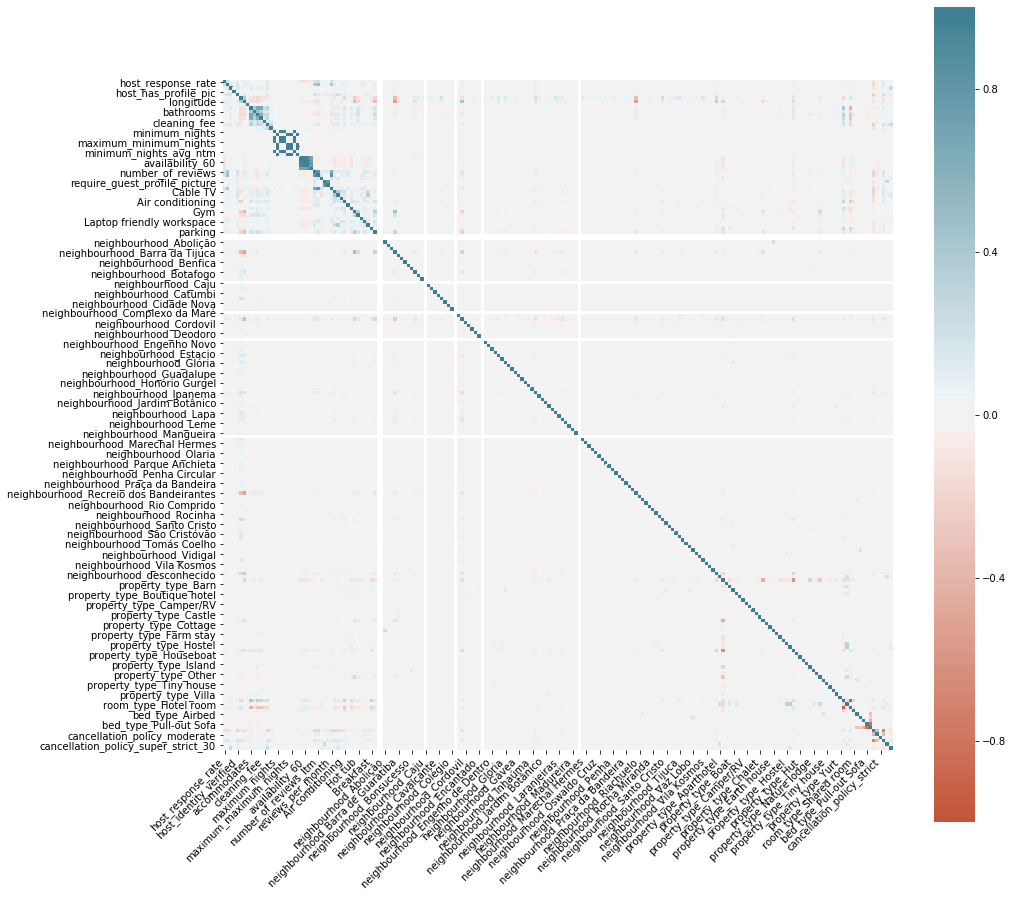

In [28]:
plt.figure(figsize=(15,15))

ax = sns.heatmap(X_train.corr(), vmin=-1, vmax=1, center=0,
                 cmap=sns.diverging_palette(20, 220, n=200),
                 square=True)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.show()

Existem algumas correlações altas e estas deveriam ser analisadas e, dependendo do caso, uma das variáveis altamente correlacionadas deveriam ser descartadas, mas vamos pular esta análise para simplificar o modelo.

Repare que existem muitas variáveis para nosso modelo. Será que estariamos sofrendo muito com a maldição da dimensionalidade?

In [29]:
n_features = len(X_train.columns)
n_features

200

Antes de fazer um primeiro modelo, vamos normalizar nossos dados.

In [30]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

X_train = pd.DataFrame(X_train, columns=X.columns)
X_val = pd.DataFrame(X_val, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)

Vamos treinar um modelo simples e selecionar apenas as 50 features mais importantes para uma seleção simples de features.

In [31]:
xgb = XGBRegressor(objective='reg:squarederror')
xgb.fit(X_train, y_train)

/home/luis/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=1)

In [32]:
train_preds = xgb.predict(X_train)
val_preds = xgb.predict(X_val)
test_preds = xgb.predict(X_test)

In [33]:
print("--> TRAIN METRICS")
print("mean_squared_error: ", mean_squared_error(y_train, train_preds))
print("mean_absolute_error: ", mean_absolute_error(y_train, train_preds))
print("r2_score: ", r2_score(y_train, train_preds))

print("\n--> VALIDATION METRICS")
print("mean_squared_error: ", mean_squared_error(y_val, val_preds))
print("mean_absolute_error: ", mean_absolute_error(y_val, val_preds))
print("r2_score: ", r2_score(y_val, val_preds))

print("\n--> TEST METRICS")
print("mean_squared_error: ", mean_squared_error(y_test, test_preds))
print("mean_absolute_error: ", mean_absolute_error(y_test, test_preds))
print("r2_score: ", r2_score(y_test, test_preds))

--> TRAIN METRICS
mean_squared_error:  1604867.964160017
mean_absolute_error:  368.2683993202535
r2_score:  0.408683245318586

--> VALIDATION METRICS
mean_squared_error:  2610873.3493433963
mean_absolute_error:  413.11613732485324
r2_score:  0.24708586956816925

--> TEST METRICS
mean_squared_error:  2423906.0269921366
mean_absolute_error:  403.9967410737424
r2_score:  0.2776103814042986


Selecionando apenas as 75 features mais importantes:

In [34]:
feature_weights = pd.DataFrame(xgb.feature_importances_, columns=['weight'], index=X_train.columns)
feature_weights.sort_values('weight', inplace=True)

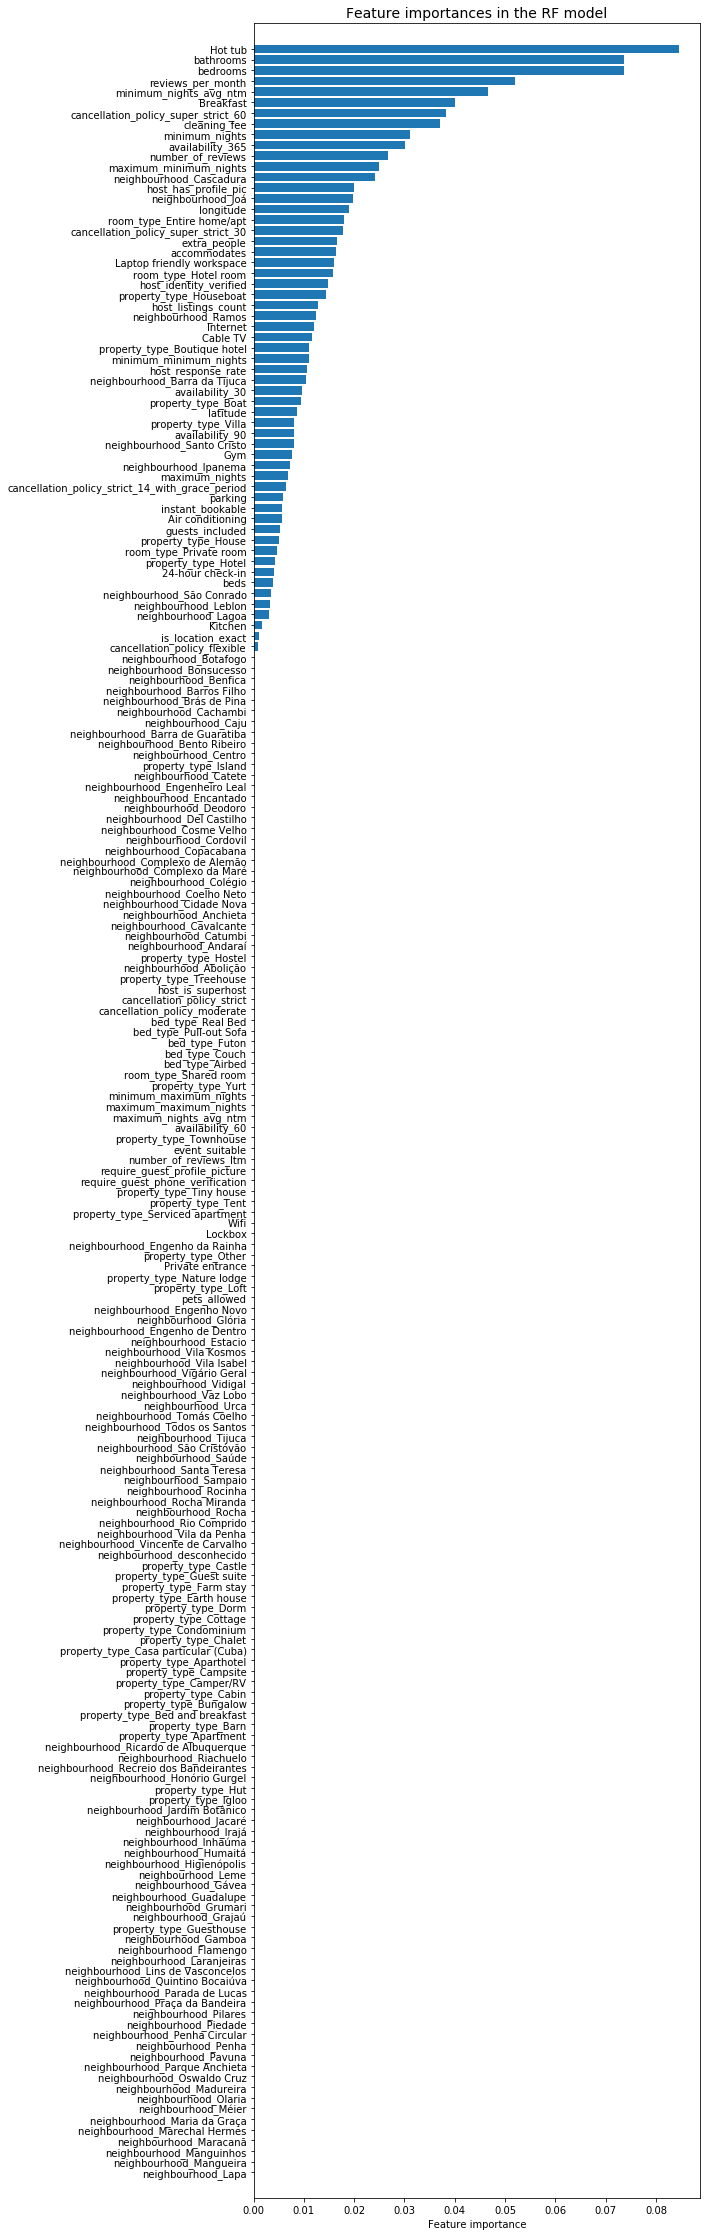

In [35]:
plt.figure(figsize=(8,40))
plt.barh(feature_weights.index, feature_weights.weight) 
plt.title("Feature importances in the RF model", fontsize=14)
plt.xlabel("Feature importance")
plt.margins(y=0.01)
plt.show()

In [36]:
most_important_75 = feature_weights[-75:].index

X_train = X_train[most_important_75]
X_val = X_val[most_important_75]
X_test = X_test[most_important_75]

Devemos também encontrar bons hyperparâmetros para nosso modelo. Para tal, vou utilizar uma busca aleatória. Como métrica principal, utilizarei o r2_score.

In [37]:
def model_train(params):
    max_depth = params[0]
    learning_rate = params[1]
    min_child_weight = params[2]
    colsample_bytree = params[3]
    gamma = params[4]
    subsample = params[5]
    
    print(params, '\n')
    
    xgb = XGBRegressor(max_depth=max_depth, learning_rate=learning_rate, objective='reg:squarederror',
                       min_child_weight=min_child_weight, colsample_bytree=colsample_bytree,
                       gamma=gamma, subsample=subsample, n_jobs=-1, random_state=123)
    xgb.fit(X_train, y_train)
    
    val_preds = xgb.predict(X_val)
    
    return -r2_score(y_val, val_preds)

search_grid = [(2, 10), (0.001, 0.1, 'log-uniform'), # max_depth, learning_rate
               (1, 10), (0.6, 1), # min_child_weigth, colsample_bytree
               (0.5, 5), (0.6, 1)] # gamma, subsample

result = gp_minimize(model_train, search_grid, random_state=123, verbose=1, n_calls=50, n_random_starts=25)

Iteration No: 1 started. Evaluating function at random point.
[8, 0.007193526575307788, 7, 0.8876601240619093, 2.710035200446688, 0.9120111047648317] 



/home/luis/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


Iteration No: 1 ended. Evaluation done at random point.
Time taken: 10.4593
Function value obtained: -0.1418
Current minimum: -0.1418
Iteration No: 2 started. Evaluating function at random point.
[5, 0.014434062917737708, 2, 0.7604070226644815, 3.3229265420192755, 0.7296603573518164] 



/home/luis/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


Iteration No: 2 ended. Evaluation done at random point.
Time taken: 6.4389
Function value obtained: -0.1938
Current minimum: -0.1938
Iteration No: 3 started. Evaluating function at random point.
[4, 0.024519429118923516, 6, 0.8527168070748201, 2.4811573012883437, 0.6334905938254337] 



/home/luis/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


Iteration No: 3 ended. Evaluation done at random point.
Time taken: 5.9380
Function value obtained: -0.2163
Current minimum: -0.2163
Iteration No: 4 started. Evaluating function at random point.
[8, 0.007173431931862409, 4, 0.796833910716937, 3.8313337583065468, 0.7430915675236087] 



/home/luis/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


Iteration No: 4 ended. Evaluation done at random point.
Time taken: 10.9140
Function value obtained: -0.1390
Current minimum: -0.2163
Iteration No: 5 started. Evaluating function at random point.
[5, 0.020391192048614396, 4, 0.6938051500729144, 4.945978789325004, 0.906398380077198] 



/home/luis/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


Iteration No: 5 ended. Evaluation done at random point.
Time taken: 5.1560
Function value obtained: -0.2201
Current minimum: -0.2201
Iteration No: 6 started. Evaluating function at random point.
[8, 0.0011375327528121482, 3, 0.6616328967387387, 0.8468891635922748, 0.9559462798427085] 



/home/luis/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


Iteration No: 6 ended. Evaluation done at random point.
Time taken: 8.3398
Function value obtained: 0.0638
Current minimum: -0.2201
Iteration No: 7 started. Evaluating function at random point.
[8, 0.02436724821378769, 6, 0.7857072222946673, 3.0579381176850413, 0.7210197815814181] 



/home/luis/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


Iteration No: 7 ended. Evaluation done at random point.
Time taken: 10.2094
Function value obtained: -0.2548
Current minimum: -0.2548
Iteration No: 8 started. Evaluating function at random point.
[6, 0.023255507788035073, 9, 0.6435715808958836, 2.729713044576489, 0.6931343719943914] 



/home/luis/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


Iteration No: 8 ended. Evaluation done at random point.
Time taken: 6.8142
Function value obtained: -0.2372
Current minimum: -0.2548
Iteration No: 9 started. Evaluating function at random point.
[5, 0.031848280352350954, 5, 0.9190913635583524, 1.7721632044971438, 0.7733672956906672] 



/home/luis/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


Iteration No: 9 ended. Evaluation done at random point.
Time taken: 6.6643
Function value obtained: -0.2347
Current minimum: -0.2548
Iteration No: 10 started. Evaluating function at random point.
[2, 0.00480387793980395, 7, 0.9477477159364727, 1.7051171980567317, 0.7826991667429024] 



/home/luis/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


Iteration No: 10 ended. Evaluation done at random point.
Time taken: 3.2460
Function value obtained: -0.0350
Current minimum: -0.2548
Iteration No: 11 started. Evaluating function at random point.
[4, 0.047217783216169464, 3, 0.8120248044799043, 1.2891769735096206, 0.7259865783562744] 



/home/luis/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


Iteration No: 11 ended. Evaluation done at random point.
Time taken: 5.1291
Function value obtained: -0.2384
Current minimum: -0.2548
Iteration No: 12 started. Evaluating function at random point.
[9, 0.0022944181326704145, 5, 0.6849192413559929, 2.8439459091720787, 0.6640399772740869] 



/home/luis/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


Iteration No: 12 ended. Evaluation done at random point.
Time taken: 11.6800
Function value obtained: 0.0069
Current minimum: -0.2548
Iteration No: 13 started. Evaluating function at random point.
[9, 0.09740468354216544, 5, 0.7239534037017381, 2.7824194298335794, 0.7123172794373944] 



/home/luis/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


Iteration No: 13 ended. Evaluation done at random point.
Time taken: 10.3356
Function value obtained: -0.2493
Current minimum: -0.2548
Iteration No: 14 started. Evaluating function at random point.
[8, 0.001648483449931646, 6, 0.9639077590536573, 1.48269206099419, 0.7452416268740072] 



/home/luis/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


Iteration No: 14 ended. Evaluation done at random point.
Time taken: 12.1154
Function value obtained: 0.0342
Current minimum: -0.2548
Iteration No: 15 started. Evaluating function at random point.
[9, 0.02647180796365379, 5, 0.6925205925249102, 2.2107862144100334, 0.8196648410110439] 



/home/luis/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


Iteration No: 15 ended. Evaluation done at random point.
Time taken: 9.9290
Function value obtained: -0.2562
Current minimum: -0.2562
Iteration No: 16 started. Evaluating function at random point.
[6, 0.0010192231643181998, 7, 0.6230592059885768, 0.693621081208125, 0.9500204537842496] 



/home/luis/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


Iteration No: 16 ended. Evaluation done at random point.
Time taken: 5.5726
Function value obtained: 0.0711
Current minimum: -0.2562
Iteration No: 17 started. Evaluating function at random point.
[4, 0.03353785779005129, 4, 0.9494009063039069, 0.6324068009839241, 0.8208174887475624] 



/home/luis/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


Iteration No: 17 ended. Evaluation done at random point.
Time taken: 5.6699
Function value obtained: -0.2280
Current minimum: -0.2562
Iteration No: 18 started. Evaluating function at random point.
[4, 0.058831513654616654, 5, 0.6772681321099586, 1.821616265845731, 0.9271710033847467] 



/home/luis/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


Iteration No: 18 ended. Evaluation done at random point.
Time taken: 3.8896
Function value obtained: -0.2363
Current minimum: -0.2562
Iteration No: 19 started. Evaluating function at random point.
[6, 0.022690856798661483, 8, 0.9474288617702777, 2.3809660541341224, 0.6235752622445548] 



/home/luis/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


Iteration No: 19 ended. Evaluation done at random point.
Time taken: 9.1637
Function value obtained: -0.2370
Current minimum: -0.2562
Iteration No: 20 started. Evaluating function at random point.
[6, 0.01102348357601837, 6, 0.7236795991739274, 4.63947181364562, 0.8621390012065815] 



/home/luis/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


Iteration No: 20 ended. Evaluation done at random point.
Time taken: 6.3705
Function value obtained: -0.1789
Current minimum: -0.2562
Iteration No: 21 started. Evaluating function at random point.
[5, 0.012083370418333352, 5, 0.7129283842501383, 1.8314443634922728, 0.8253923930452528] 



/home/luis/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


Iteration No: 21 ended. Evaluation done at random point.
Time taken: 5.6250
Function value obtained: -0.1794
Current minimum: -0.2562
Iteration No: 22 started. Evaluating function at random point.
[8, 0.010845194724630929, 4, 0.8531115434499772, 4.4290355907739, 0.6671553778669195] 



/home/luis/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


Iteration No: 22 ended. Evaluation done at random point.
Time taken: 11.3973
Function value obtained: -0.1849
Current minimum: -0.2562
Iteration No: 23 started. Evaluating function at random point.
[10, 0.00499838678036971, 8, 0.6261846167693951, 0.5240897977385134, 0.9547778590042487] 



/home/luis/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


Iteration No: 23 ended. Evaluation done at random point.
Time taken: 10.2175
Function value obtained: -0.0925
Current minimum: -0.2562
Iteration No: 24 started. Evaluating function at random point.
[9, 0.0025050450693305513, 1, 0.9269339678513535, 1.5882242848017576, 0.62243320482198] 



/home/luis/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


Iteration No: 24 ended. Evaluation done at random point.
Time taken: 14.8378
Function value obtained: 0.0016
Current minimum: -0.2562
Iteration No: 25 started. Evaluating function at random point.
[3, 0.008866326295401412, 6, 0.7667180559298319, 1.6512931866690148, 0.7526048426805075] 



/home/luis/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


Iteration No: 25 ended. Evaluation done at random point.
Time taken: 4.3652
Function value obtained: -0.1235
Current minimum: -0.2562
Iteration No: 26 started. Searching for the next optimal point.
[10, 0.0464048770329404, 10, 1.0, 5.0, 0.8785450018953718] 



/home/luis/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


Iteration No: 26 ended. Search finished for the next optimal point.
Time taken: 13.7629
Function value obtained: -0.2681
Current minimum: -0.2681
Iteration No: 27 started. Searching for the next optimal point.
[10, 0.04666207425831571, 1, 0.6049665307876273, 2.4729472631707825, 0.9064219044053184] 



/home/luis/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


Iteration No: 27 ended. Search finished for the next optimal point.
Time taken: 10.3603
Function value obtained: -0.2487
Current minimum: -0.2681
Iteration No: 28 started. Searching for the next optimal point.
[9, 0.04607338380905781, 10, 0.6, 5.0, 0.6] 



/home/luis/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


Iteration No: 28 ended. Search finished for the next optimal point.
Time taken: 10.3684
Function value obtained: -0.2570
Current minimum: -0.2681
Iteration No: 29 started. Searching for the next optimal point.
[2, 0.1, 10, 1.0, 5.0, 1.0] 



/home/luis/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


Iteration No: 29 ended. Search finished for the next optimal point.
Time taken: 3.1185
Function value obtained: -0.2280
Current minimum: -0.2681
Iteration No: 30 started. Searching for the next optimal point.
[10, 0.032311935674638505, 10, 1.0, 0.5, 1.0] 



/home/luis/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


Iteration No: 30 ended. Search finished for the next optimal point.
Time taken: 12.5029
Function value obtained: -0.2573
Current minimum: -0.2681
Iteration No: 31 started. Searching for the next optimal point.
[8, 0.04314721191820411, 10, 1.0, 5.0, 1.0] 



/home/luis/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


Iteration No: 31 ended. Search finished for the next optimal point.
Time taken: 9.9657
Function value obtained: -0.2604
Current minimum: -0.2681
Iteration No: 32 started. Searching for the next optimal point.
[10, 0.09861024855291617, 9, 0.8800359415970969, 1.407844251027527, 0.8376349610204663] 



/home/luis/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


Iteration No: 32 ended. Search finished for the next optimal point.
Time taken: 13.2589
Function value obtained: -0.2635
Current minimum: -0.2681
Iteration No: 33 started. Searching for the next optimal point.
[10, 0.1, 10, 1.0, 5.0, 1.0] 



/home/luis/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


Iteration No: 33 ended. Search finished for the next optimal point.
Time taken: 12.9655
Function value obtained: -0.2687
Current minimum: -0.2687
Iteration No: 34 started. Searching for the next optimal point.
[7, 0.08632237272875491, 10, 0.9714945030910013, 2.815031047274137, 0.6936834175370262] 



/home/luis/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


Iteration No: 34 ended. Search finished for the next optimal point.
Time taken: 10.4890
Function value obtained: -0.2412
Current minimum: -0.2687
Iteration No: 35 started. Searching for the next optimal point.
[10, 0.06952460334168363, 10, 0.9993095904122777, 3.6963562105200545, 0.9819168264164692] 



/home/luis/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


Iteration No: 35 ended. Search finished for the next optimal point.
Time taken: 12.5537
Function value obtained: -0.2716
Current minimum: -0.2716
Iteration No: 36 started. Searching for the next optimal point.
[10, 0.06611479949997663, 10, 0.6045946268163506, 0.5609728453603247, 0.9952976473147281] 



/home/luis/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


Iteration No: 36 ended. Search finished for the next optimal point.
Time taken: 8.9553
Function value obtained: -0.2646
Current minimum: -0.2716
Iteration No: 37 started. Searching for the next optimal point.
[10, 0.06733110902033076, 1, 0.9529521780553698, 4.985350489147743, 0.8215848306829203] 



/home/luis/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


Iteration No: 37 ended. Search finished for the next optimal point.
Time taken: 15.0092
Function value obtained: -0.2539
Current minimum: -0.2716
Iteration No: 38 started. Searching for the next optimal point.
[10, 0.09685166475540843, 10, 0.6158689194355526, 4.814031968532815, 0.6543495361244185] 



/home/luis/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


Iteration No: 38 ended. Search finished for the next optimal point.
Time taken: 11.0793
Function value obtained: -0.2555
Current minimum: -0.2716
Iteration No: 39 started. Searching for the next optimal point.
[10, 0.06997062534521153, 10, 1.0, 0.5, 1.0] 



/home/luis/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


Iteration No: 39 ended. Search finished for the next optimal point.
Time taken: 12.1263
Function value obtained: -0.2599
Current minimum: -0.2716
Iteration No: 40 started. Searching for the next optimal point.
[10, 0.030108933450524605, 10, 0.9667924192651773, 4.865030046944042, 0.6187384475631008] 



/home/luis/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


Iteration No: 40 ended. Search finished for the next optimal point.
Time taken: 16.4147
Function value obtained: -0.2512
Current minimum: -0.2716
Iteration No: 41 started. Searching for the next optimal point.
[10, 0.1, 10, 1.0, 5.0, 1.0] 



/home/luis/anaconda3/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/home/luis/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


Iteration No: 41 ended. Search finished for the next optimal point.
Time taken: 12.0516
Function value obtained: -0.2687
Current minimum: -0.2716
Iteration No: 42 started. Searching for the next optimal point.
[2, 0.04701689827491164, 10, 0.8181925653211445, 4.42329670149951, 0.8868655647669947] 



/home/luis/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


Iteration No: 42 ended. Search finished for the next optimal point.
Time taken: 3.0971
Function value obtained: -0.2066
Current minimum: -0.2716
Iteration No: 43 started. Searching for the next optimal point.
[10, 0.1, 10, 1.0, 5.0, 1.0] 



/home/luis/anaconda3/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/home/luis/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


Iteration No: 43 ended. Search finished for the next optimal point.
Time taken: 12.1939
Function value obtained: -0.2687
Current minimum: -0.2716
Iteration No: 44 started. Searching for the next optimal point.
[10, 0.1, 10, 1.0, 5.0, 1.0] 



/home/luis/anaconda3/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/home/luis/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


Iteration No: 44 ended. Search finished for the next optimal point.
Time taken: 11.6154
Function value obtained: -0.2687
Current minimum: -0.2716
Iteration No: 45 started. Searching for the next optimal point.
[2, 0.1, 1, 0.9826380184587995, 2.432174910050322, 0.7777186912618494] 



/home/luis/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


Iteration No: 45 ended. Search finished for the next optimal point.
Time taken: 3.7596
Function value obtained: -0.2169
Current minimum: -0.2716
Iteration No: 46 started. Searching for the next optimal point.
[10, 0.1, 10, 0.6, 5.0, 1.0] 



/home/luis/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


Iteration No: 46 ended. Search finished for the next optimal point.
Time taken: 8.6660
Function value obtained: -0.2672
Current minimum: -0.2716
Iteration No: 47 started. Searching for the next optimal point.
[8, 0.09930042546765715, 1, 0.6693192698343646, 0.8763576601473599, 0.9944514858374982] 



/home/luis/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


Iteration No: 47 ended. Search finished for the next optimal point.
Time taken: 8.3402
Function value obtained: -0.2570
Current minimum: -0.2716
Iteration No: 48 started. Searching for the next optimal point.
[10, 0.1, 10, 0.6, 5.0, 1.0] 



/home/luis/anaconda3/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/home/luis/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


Iteration No: 48 ended. Search finished for the next optimal point.
Time taken: 8.8768
Function value obtained: -0.2672
Current minimum: -0.2716
Iteration No: 49 started. Searching for the next optimal point.
[8, 0.03518728087213962, 10, 0.7019692980409433, 0.6389184094553384, 0.9990764261059808] 



/home/luis/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


Iteration No: 49 ended. Search finished for the next optimal point.
Time taken: 8.1199
Function value obtained: -0.2727
Current minimum: -0.2727
Iteration No: 50 started. Searching for the next optimal point.
[10, 0.028650225394654914, 10, 0.6036574623365062, 4.496111460162941, 0.9962556774436695] 



/home/luis/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


Iteration No: 50 ended. Search finished for the next optimal point.
Time taken: 10.0101
Function value obtained: -0.2671
Current minimum: -0.2727


In [38]:
max_depth, learning_rate, min_child_weight, colsample_bytree, gamma, subsample = result.x

In [39]:
xgb = XGBRegressor(max_depth=max_depth, learning_rate=learning_rate,
                       min_child_weight=min_child_weight, colsample_bytree=colsample_bytree,
                       gamma=gamma, subsample=subsample, n_jobs=-1, random_state=123)
xgb.fit(X_train, y_train)

[18:16:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/home/luis/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7019692980409433,
             gamma=0.6389184094553384, importance_type='gain',
             learning_rate=0.03518728087213962, max_delta_step=0, max_depth=8,
             min_child_weight=10, missing=None, n_estimators=100, n_jobs=-1,
             nthread=None, objective='reg:linear', random_state=123,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=0.9990764261059808, verbosity=1)

In [40]:
train_preds = xgb.predict(X_train)
val_preds = xgb.predict(X_val)
test_preds = xgb.predict(X_test)

In [41]:
print("--> TRAIN METRICS")
print("mean_squared_error: ", mean_squared_error(y_train, train_preds))
print("mean_absolute_error: ", mean_absolute_error(y_train, train_preds))
print("r2_score: ", r2_score(y_train, train_preds))

print("\n--> VALIDATION METRICS")
print("mean_squared_error: ", mean_squared_error(y_val, val_preds))
print("mean_absolute_error: ", mean_absolute_error(y_val, val_preds))
print("r2_score: ", r2_score(y_val, val_preds))

print("\n--> TEST METRICS")
print("mean_squared_error: ", mean_squared_error(y_test, test_preds))
print("mean_absolute_error: ", mean_absolute_error(y_test, test_preds))
print("r2_score: ", r2_score(y_test, test_preds))

--> TRAIN METRICS
mean_squared_error:  1273155.1604665057
mean_absolute_error:  313.03091702313776
r2_score:  0.5309034795974745

--> VALIDATION METRICS
mean_squared_error:  2521961.5661874055
mean_absolute_error:  381.28128034220276
r2_score:  0.272725925190504

--> TEST METRICS
mean_squared_error:  2367161.9478734364
mean_absolute_error:  375.299344948368
r2_score:  0.29452165321750046
